## Reference Links


* https://huggingface.co/vikhyatk/moondream2
* https://blog.roboflow.com/finetuning-moondream2/





# Installation

In [1]:
!pip --quiet install transformers timm einops
!pip --quiet install pyvips-binary==8.16.0
!pip --quiet install pyvips==2.2.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## LOADING MOONDREAM2 MODEL AND TOKENIZER

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image

model = AutoModelForCausalLM.from_pretrained(
    "vikhyatk/moondream2",
    revision="2025-01-09",
    trust_remote_code=True,
    # Uncomment to run on GPU.
    device_map={"": "cuda"}
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

hf_moondream.py:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

vision.py:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

image_crops.py:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

config.py:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

layers.py:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

moondream.py:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

region.py:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

weights.py:   0%|          | 0.00/9.71k [00:00<?, ?B/s]

utils.py:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

text.py:   0%|          | 0.00/5.31k [00:00<?, ?B/s]

rope.py:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.85G [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

In [ ]:
model_id = "vikhyatk/moondream2"
revision="2025-01-09"
tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)

## DISPLAY IMAGE

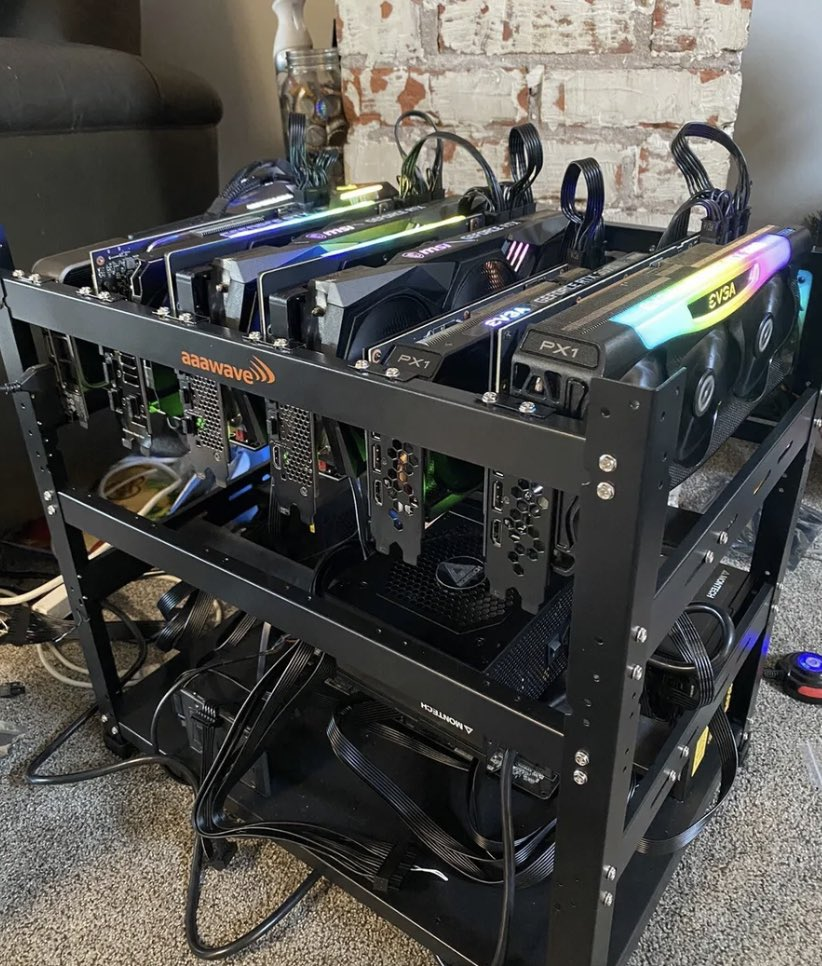

In [6]:
import requests
from io import BytesIO

response = requests.get("https://raw.githubusercontent.com/vikhyat/moondream/main/assets/demo-2.jpg")
image = Image.open(BytesIO(response.content)) # image from URL
display(image)

## ASK QUESTIONS

In [7]:
## ASK QUESTIONS
enc_image = model.encode_image(image)
print(model.answer_question(enc_image, "Describe this image.", tokenizer))

The image shows a black computer tower rack with six black shelves, each holding a computer. The rack is positioned against a white brick wall, with a black chair visible in the background. The computers are arranged in a staggered formation, with the top row slightly offset from the bottom row. Each computer is equipped with a colorful LED light, primarily blue and green, and a black speaker. The computers are housed in black plastic cases with a matte finish. The rack is situated on a carpeted floor, with a small portion of a white object visible in the bottom right corner.
